## Access Satellite Ghrsst L3C 1Day Nighttime Himawari8 data in Zarr
A jupyter notebook to show how to access and plot the AODN satellite_ghrsst_l3c_1day_nighttime_himawari8 dataset available as a [Zarr](https://zarr.dev/) dataset on S3.

More information about the dataset available [here](https://catalogue-imos.aodn.org.au/geonetwork/srv/eng/catalog.search#/metadata/72b65fb8-84e1-4a56-b32c-7f15970903d2).

📌 The point of truth for this notebook is [on GitHub](https://github.com/aodn/aodn_cloud_optimised/tree/main/notebooks/satellite_ghrsst_l3c_1day_nighttime_himawari8.ipynb).

In [1]:
dataset_name = "satellite_ghrsst_l3c_1day_nighttime_himawari8"

In [2]:
import xarray as xr
import fsspec

## Install/Update packages and Load common functions

In [3]:
# only run once, then restart session if needed
!pip install uv

import os
import sys

def is_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False

# Get the current directory of the notebook
current_dir = os.getcwd()

# Check if requirements.txt exists in the current directory
local_requirements = os.path.join(current_dir, 'requirements.txt')
if os.path.exists(local_requirements):
    requirements_path = local_requirements
else:
    # Fall back to the online requirements.txt file
    requirements_path = 'https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/notebooks/requirements.txt'

# Install packages using uv and the determined requirements file
if is_colab():
    import xarray as xr
    xr.set_options(display_style='text')
    os.system(f'uv pip install --system -r {requirements_path}')
else:
    os.system('uv venv')
    os.system(f'uv pip install -r {requirements_path}')

Using CPython 3.12.6 interpreter at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised/bin/python
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate
Audited 234 packages in 36ms


In [4]:
import requests
import os
if not os.path.exists('DataQuery.py'):
  print('Downloading DataQuery.py')
  url = 'https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/aodn_cloud_optimised/lib/DataQuery.py'
  response = requests.get(url)
  with open('DataQuery.py', 'w') as f:
      f.write(response.text)

In [5]:
from DataQuery import plot_gridded_variable, create_timeseries, plot_time_coverage

In [6]:
# remote zarr dataset
url = f's3://aodn-cloud-optimised/{dataset_name}.zarr/'
ds = xr.open_zarr(fsspec.get_mapper(url, anon=True), chunks=None, consolidated=True)
ds

<xarray.Dataset> Size: 6TB
Dimensions:                  (time: 2656, lat: 4500, lon: 6000)
Coordinates:
  * lat                      (lat) float32 18kB 19.99 19.97 ... -69.97 -69.99
  * lon                      (lon) float32 24kB 70.01 70.03 ... 190.0 190.0
  * time                     (time) datetime64[ns] 21kB 2015-09-01T14:39:59 ....
Data variables: (12/13)
    crs                      (time) int32 11kB ...
    dt_analysis              (time, lat, lon) float64 574GB ...
    filename                 (time) <U59 627kB ...
    l2p_flags                (time, lat, lon) float64 574GB ...
    quality_level            (time, lat, lon) float64 574GB ...
    satellite_zenith_angle   (time, lat, lon) float64 574GB ...
    ...                       ...
    sea_surface_temperature  (time, lat, lon) float64 574GB ...
    sses_bias                (time, lat, lon) float64 574GB ...
    sses_count               (time, lat, lon) float64 574GB ...
    sses_standard_deviation  (time, lat, lon) float64 574GB ...
    sst_dtime                (time, lat, lon) float64 574GB ...
    wind_speed               (time, lat, lon) float64 574GB ...
Attributes: (12/48)
    Conventions:                CF-1.6
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    Metadata_Link:              TBA
    acknowledgment:             Any use of these data requires the following ...
    cdm_data_type:              Grid
    comment:                    Multi swath AHI_H08  SSTskin retrievals obtai...
    ...                         ...
    summary:                    Skin sea surface temperature retrievals from ...
    time_coverage_end:          20220909T034000Z
    time_coverage_start:        20220908T034000Z
    title:                      Nighttime gridded single-sensor multiple-swat...
    uuid:                       f3a4515b-cb51-41ea-ab61-590a1561bcdc
    westernmost_longitude:      70.01f

## Plot time coverage

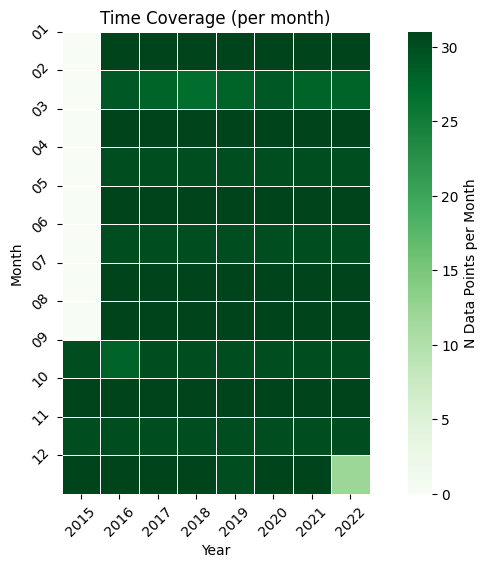

In [7]:
plot_time_coverage(ds)

## Timeseries at a point

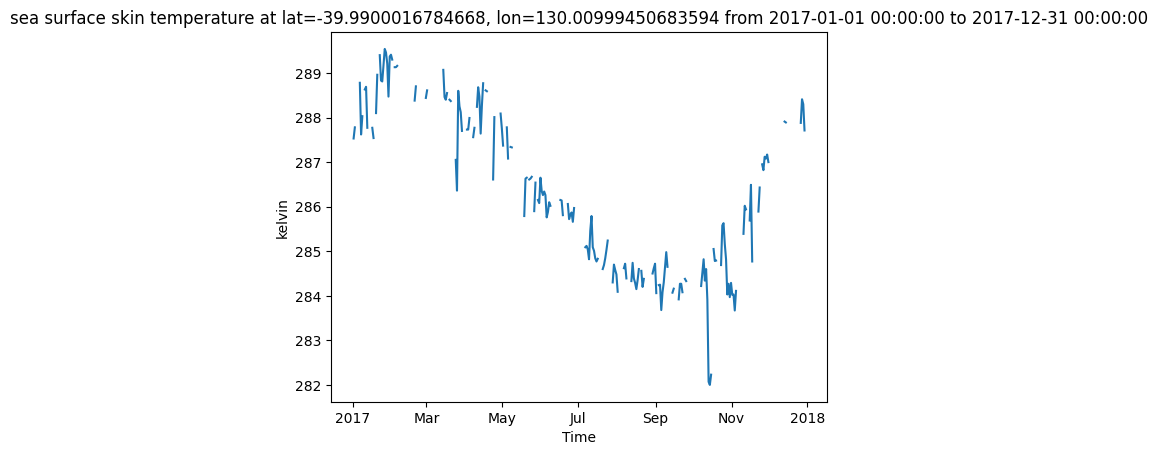

CPU times: user 4.11 s, sys: 1.44 s, total: 5.55 s
Wall time: 22.3 s


In [8]:
%%time
time_series_df = create_timeseries(ds, 'sea_surface_temperature', lat=-40, lon=130, start_time='2017-01-01', end_time='2017-12-31')

## Plot a gridded variable

Nearest date in dataset: <xarray.DataArray 'time' ()> Size: 8B
array('2017-12-19T14:39:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 2017-12-19T14:39:59
Attributes:
    axis:           T
    comment:        A typical reference time for the data
    long_name:      reference time of sst file
    standard_name:  time
Variable Long Name: sea surface skin temperature


/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:880: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


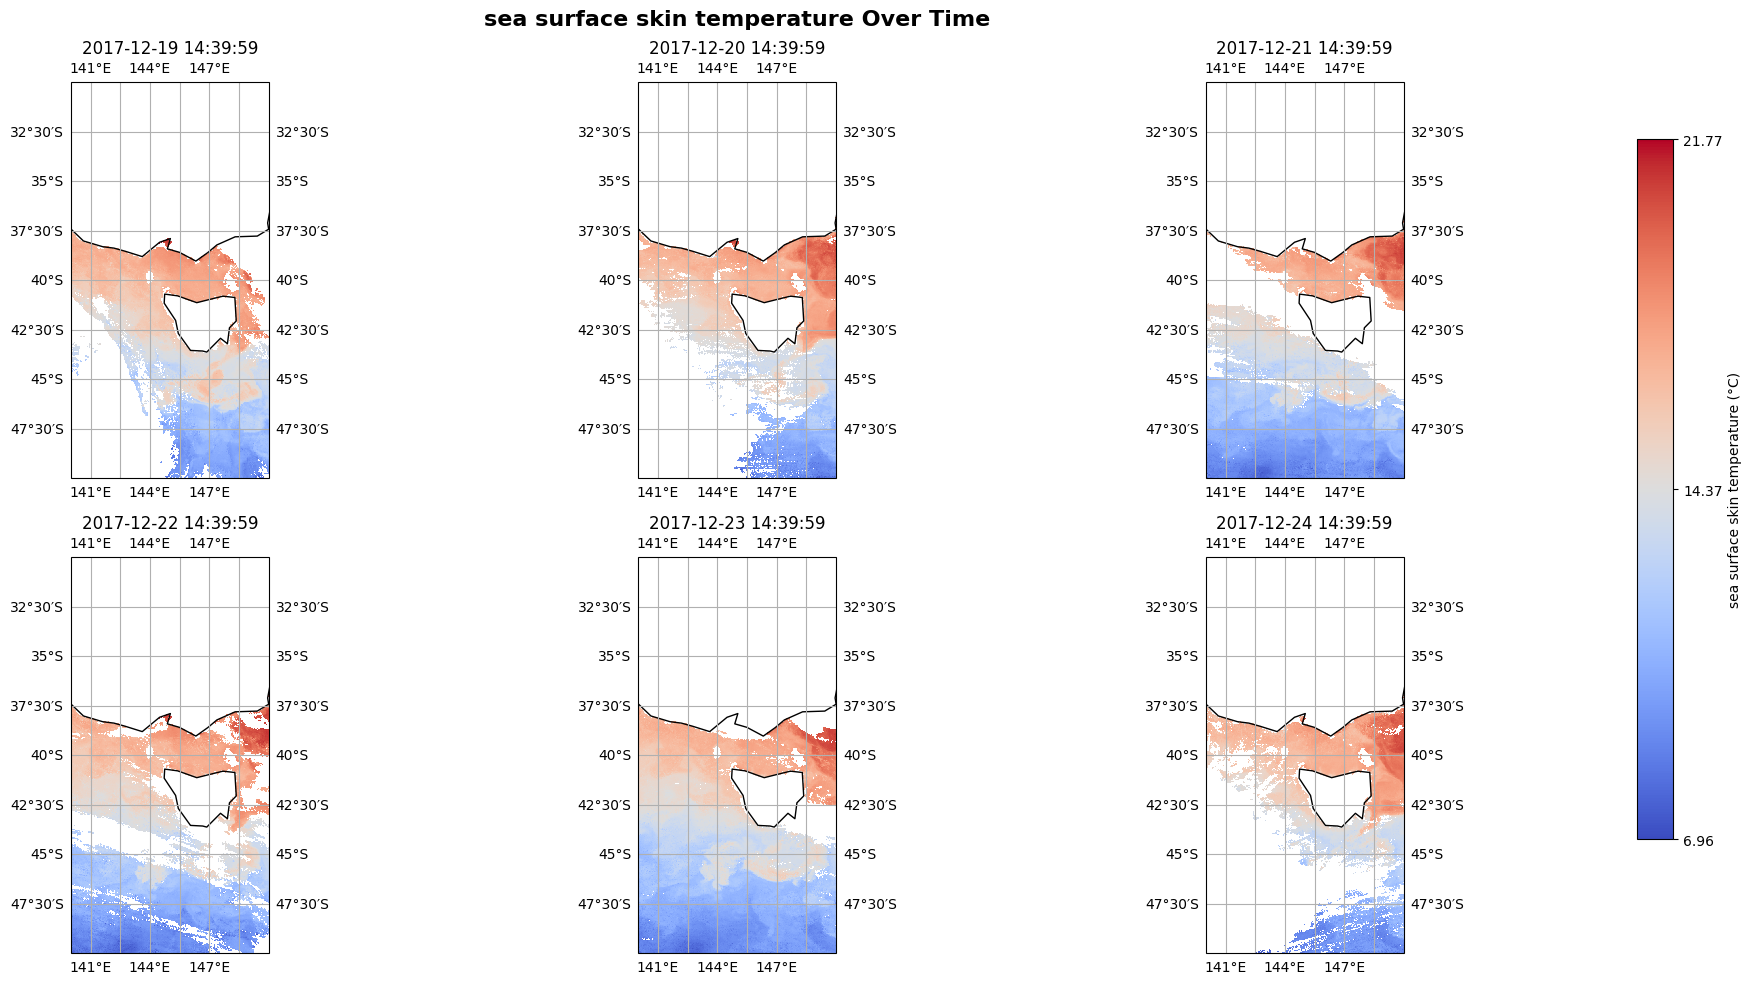

CPU times: user 3.63 s, sys: 2.89 s, total: 6.52 s
Wall time: 15.7 s


In [9]:
%%time
plot_gridded_variable(ds, start_date='2017-12-20', lon_slice=(140, 150), lat_slice=(-50, -30), var_name='sea_surface_temperature', n_days=6, coastline_resolution="110m")